In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.6078253 , -0.01685781,  0.1703034 , -0.53021143, -0.5534187 ,
        -0.04996334, -0.54741792, -0.52900002, -0.5023614 , -0.12984142],
       [-0.36199716, -0.87682545, -0.38324638,  1.2973857 ,  1.02565402,
         0.74903328,  0.41572281,  0.19825686,  0.34593403, -0.06658689]])

In [4]:
test_Features[:2]

array([[ 1.27122498,  0.13391425,  0.34931835,  0.19130926,  0.30262875,
        -2.13876045,  1.08546044, -0.96434103, -0.00693817,  1.83782015],
       [-0.92168569, -0.66692741, -1.07095157,  1.92864793,  1.91065867,
         0.17800411, -0.57222048,  0.2482115 , -0.68429497, -1.55833672]])

In [5]:
train_Label[:4]

array([1, 0, 1, 0])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=10*4,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=10*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=10*2,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=10,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(10, activation='tanh'))

In [20]:
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 40)            80        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 40)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 30)            1230      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 30)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 20)            620       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 20)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 10)            210       
__________

In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 4s 418us/step - loss: 0.6290 - acc: 0.7023 - val_loss: 0.5576 - val_acc: 0.7521
Epoch 2/30
10194/10194 [==============================] - 1s 73us/step - loss: 0.5107 - acc: 0.7655 - val_loss: 0.4543 - val_acc: 0.7948
Epoch 3/30
10194/10194 [==============================] - 1s 61us/step - loss: 0.4313 - acc: 0.8028 - val_loss: 0.3995 - val_acc: 0.8227
Epoch 4/30
10194/10194 [==============================] - 1s 67us/step - loss: 0.3878 - acc: 0.8362 - val_loss: 0.3699 - val_acc: 0.8388
Epoch 5/30
10194/10194 [==============================] - 1s 107us/step - loss: 0.3630 - acc: 0.8500 - val_loss: 0.3579 - val_acc: 0.8439
Epoch 6/30
10194/10194 [==============================] - 1s 139us/step - loss: 0.3493 - acc: 0.8549 - val_loss: 0.3492 - val_acc: 0.8474
Epoch 7/30
10194/10194 [==============================] - 1s 54us/step - loss: 0.3421 - acc: 0.8599 - val_loss: 0.3463 - val_a

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

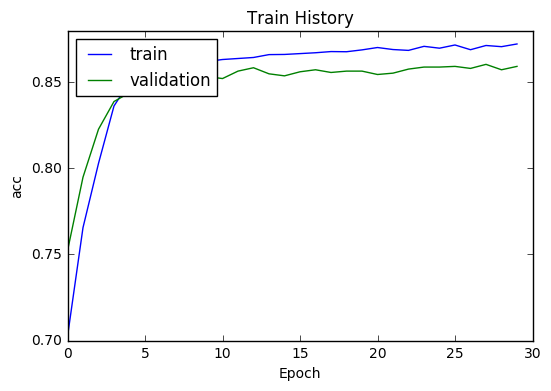

In [25]:
show_train_history(train_history,'acc','val_acc')

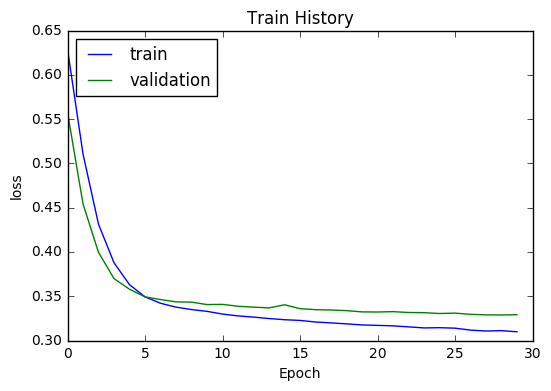

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 0s 29us/step


In [28]:
scores[1]

0.869364346034667